## PHASE 4 PROJECT
## Syriatel Customer Charn Prediction Project

## Business Understanding

Syriatel is faced with a challenge where there is a high churn rate with most of its customers abandoning their services and switching to their competitors.
 The company has identified this problem and is now seeking to build a classifier that will help them predict whether a customer will soon stop doing business with them. 
This will be done by proper analysis using their dataset to gain insights on what factors result in a high churning rate. A prediction model will be developed and this will provide insights and recommendations to the telecommunication company that will help them retain customers and avoid churning.


## Data Understanding

In [1]:
# Importing relevant libraries to be used.

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
#loading the dataset
Telecom_df = pd.read_csv("churn_in_telcom.csv")
#making a copy of the dataset
Telecom1_df = Telecom_df.copy(deep = True)
#checking the first 5 rows
Telecom1_df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Descriptive exploration
# a function to summarise the data set
# check number of categorical and numerical columns
def columns_dtypes(df):
    print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    print()
    num = len(df.select_dtypes(include=np.number).columns)
    cat = len(df.select_dtypes(include='object').columns)
    print(f"Numerical columns: {num}")
    print(f"Categorical columns: {cat}")
    print()
    print("These are the datatypes of column :")
    return df.dtypes

In [4]:
columns_dtypes(Telecom1_df)

This dataset has 3333 rows and 21 columns

Numerical columns: 16
Categorical columns: 4

These are the datatypes of column :


state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
Telecom1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
Telecom1_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Numerical Columns
print(f"Numerical Columns: {Telecom1_df.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {Telecom1_df.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


In [8]:
#converting 'area code' datatype
Telecom1_df['area code']= Telecom1_df['area code'].astype(object)

## Data Preparation

## Data pre-processing
Identifying and correcting inaccuracies, inconsistencies, and irrelevant data from a dataset. These were the steps followed in dealing with these. We looked into handling missing values,removing duplicates,outliers,correcting the data format and transforming variables to make the data ready for modelling and predictions.


In [9]:
def check_duplicates_missing(dataframe):
    # calculate percentage of missing values
    percent_missing = dataframe.isnull().mean().round(4) * 100
    count_missing = dataframe.isnull().sum()
    # calculate percentage of duplicate rows
    percent_duplicates = dataframe.duplicated().mean() * 100
    # create result dataframe
    result = pd.DataFrame({'Missing Values %': percent_missing, 
                           'Missing Values Count': count_missing, 
                           'Duplicate Values %': percent_duplicates})
    # find column with most missing values
    if percent_missing.max() !=0:
        column_most_missing = percent_missing.idxmax()
        print(f"{(column_most_missing).capitalize()} is the column with most null count.")
        print()
    else:
        print("No column with missing values")
    if percent_duplicates.max() !=0:
        column_most_duplicates = percent_duplicates.idxmax()
        print("Column with most duplicates:",column_most_duplicates)
    else:
        print("No duplicates")
    return result

In [10]:
check_duplicates_missing(Telecom1_df)

No column with missing values
No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
state,0.0,0,0.0
account length,0.0,0,0.0
area code,0.0,0,0.0
phone number,0.0,0,0.0
international plan,0.0,0,0.0
voice mail plan,0.0,0,0.0
number vmail messages,0.0,0,0.0
total day minutes,0.0,0,0.0
total day calls,0.0,0,0.0
total day charge,0.0,0,0.0


In [11]:
 #Exploratory Data Analysis
#checking for unique for unique data in the dataset
Telecom1_df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [12]:
# printing the unique values of the categorical variables

print(Telecom1_df['churn'].unique())
print(Telecom1_df['international plan'].unique())
print(Telecom1_df['voice mail plan'].unique())
print(Telecom1_df['customer service calls'].unique())
print(Telecom1_df['area code'].unique())


[False  True]
['no' 'yes']
['yes' 'no']
[1 0 2 3 4 5 7 9 6 8]
[415 408 510]


In [13]:
# Checking value_count of churn(target variable) column
Telecom1_df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

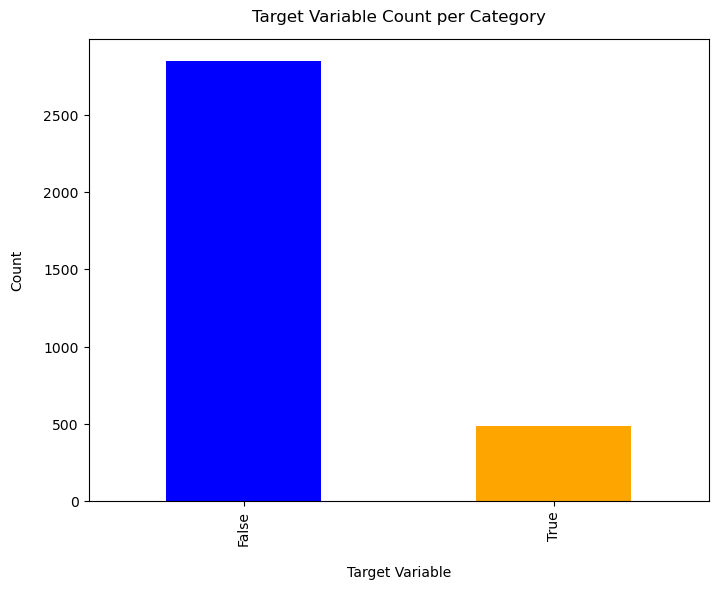

In [14]:
# overview of the target variable
churn_counts = Telecom1_df['churn'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Target Variable", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Target Variable Count per Category", y=1.02)
plt.show()



In [15]:
#checking for the percentage rate of the churn
percentage_churn = 100 * Telecom1_df['churn'].value_counts() / len(Telecom1_df['churn'])
percentage_churn

churn
False    85.508551
True     14.491449
Name: count, dtype: float64

from the findings above the data is highly imbalanced

## Explaratory Data Analysis

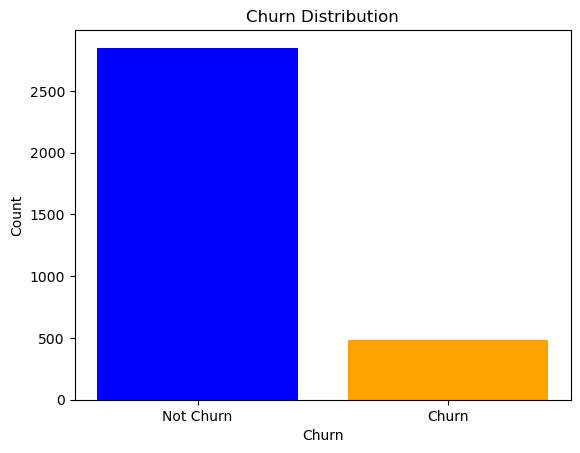

In [16]:
 #Univariate Analysis
#plotting the target variable distribution
class_counts = Telecom1_df.groupby("churn").size()

# Create a bar chart 
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Churn", "Churn"])

# Show the chart
plt.show()

From the bar graph above about 483 customers from the total 3333 in the dataset have terminated their contract and about the remaining 2850 are still customers.The aim is to minimize the loses by retaining the clients we have.

In [17]:
#distribution of area code
# Pie chart of area code feature
area = Telecom1_df['area code'].value_counts()
transanction = area.index
quantity = area.values

# plot pie circle with plotly
figure = px.pie(Telecom1_df,
               values = quantity,
               names = transanction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

From the analysis above close to half of the customers are in area 415 this is represented by the percentage 49.7%

## Distribution of the numerical features

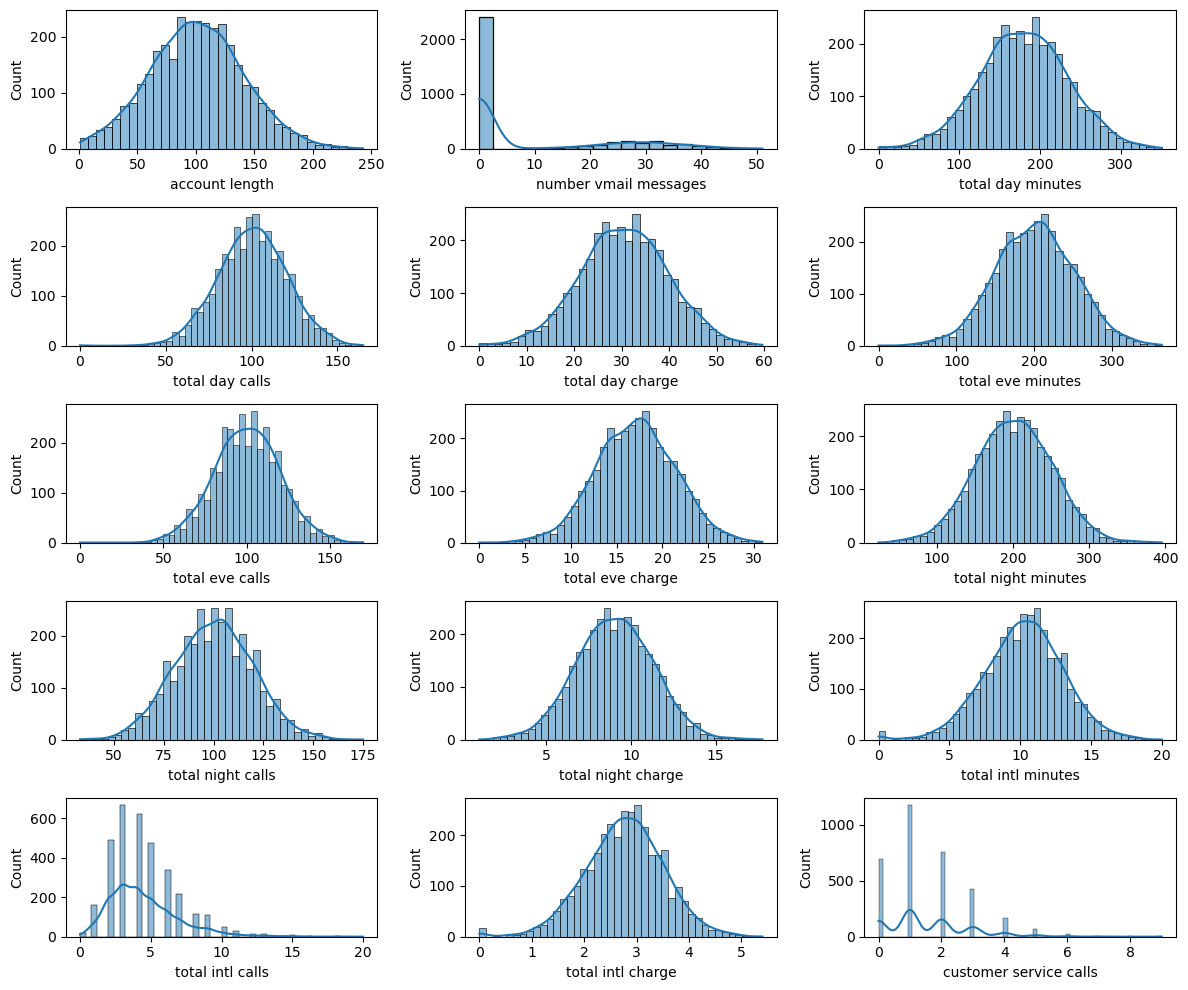

In [18]:


# List of numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                    'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                    'total night minutes', 'total night calls', 'total night charge',
                    'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(Telecom1_df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()


From the visualization above the observations on the distribution of the numerical features can be seen
 1. The distribution in the Account length is positively skewed, indicating that the majority of customers have shorter account lengths. This suggests potential inaccuracies in predicting customer churn, as longer account lengths might be a more accurate predictor.

 2. The distribution of Number of Voice Mail Messages is relatively even, indicating that the number of voice mail messages is not a particularly strong predictor of customer churn.
 3. Total Day Minutes, Total Day Calls, and Total Day Charge: These features show a significant amount of potential noise in the data, as the distribution is positively skewed and there is a significant amount of overlap between the classes.

4. Total Evening Minutes, Calls, and Charge: These features show a similar pattern to the Total Day features, indicating potential noise and overlap between classes.

5. Total Nighttime Minutes, Calls, and Charge: The distribution of thie features is negatively skewed, indicating that the majority of customers have less activity at night. This suggests potential inaccuracies in predicting customer churn, as higher activity at night might be a more accurate predictor.
6. Total International Minutes, Calls, and Charge: These features show a similar pattern to the Total Day features, indicating potential noise and overlap between classes.

7. The distribution of Customer Service Calls is negatively skewed, indicating that the majority of customers have fewer customer service calls. This suggests potential inaccuracies in predicting customer churn, as higher customer service calls might be a more accurate predictor

## Distribution of the Categorical Features

In [19]:
#Checking the distribution of categorical features
def plot_categorical_distribution(Telecom1_df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, data=Telecom1_df,color='blue', order=Telecom1_df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

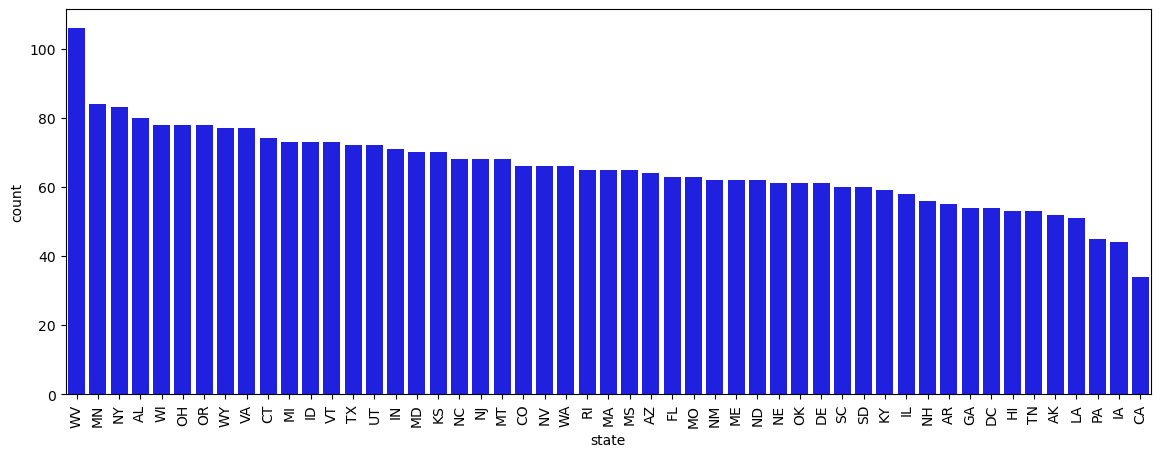

In [20]:
# State
plot_categorical_distribution(Telecom1_df,feature='state')

From the visualizaton above the states with highest customers are West Virginia,Minnesota,NewYork,Alabama and Wisconsin while Carlifonia has the lowest number of customers.


In [21]:
#International plan
Telecom1_df['international plan'].value_counts()

international plan
no     3010
yes     323
Name: count, dtype: int64

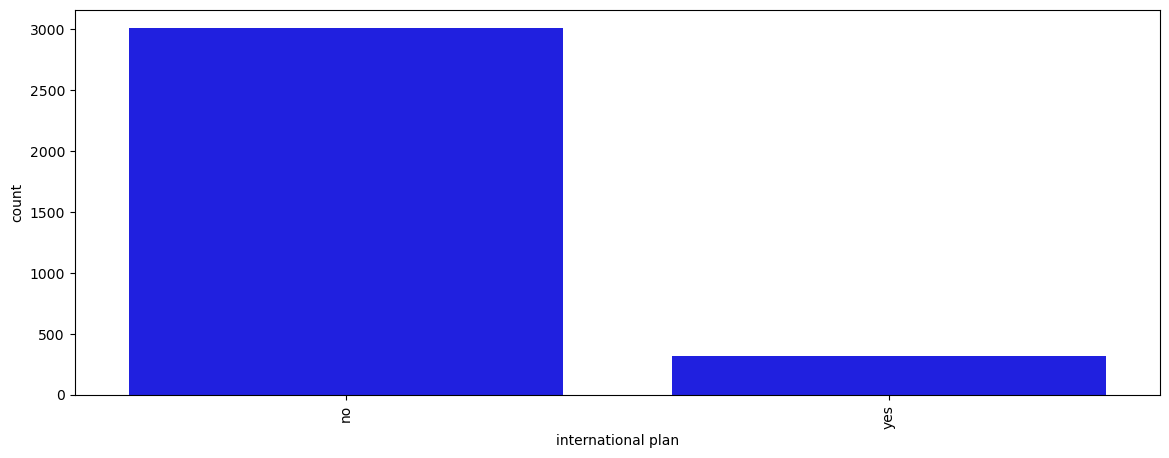

In [22]:

plot_categorical_distribution(Telecom1_df,'international plan')

From the visualization above the number of customers who have international plan is about 323 out of the total 3333.

In [23]:
#Voice mail plan
Telecom1_df['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

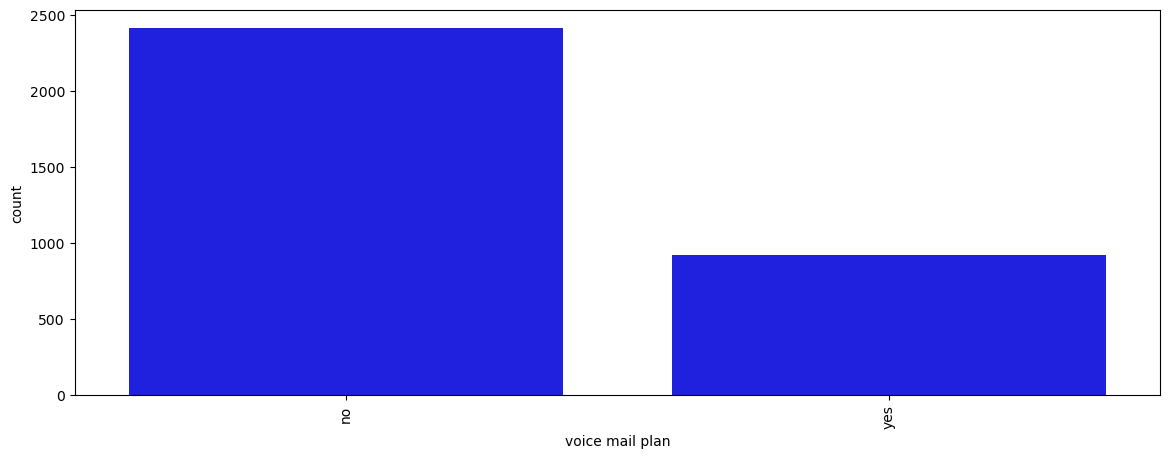

In [24]:
plot_categorical_distribution(Telecom1_df, 'voice mail plan')

From the visualization 922 customers have a voice mail plan

## Bivariate Analysis

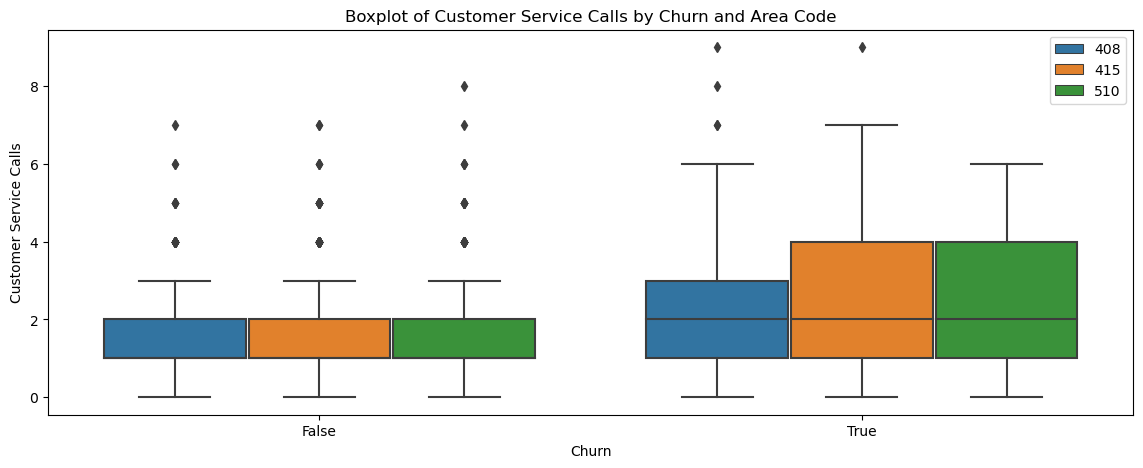

In [25]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=Telecom1_df, x='churn', y='customer service calls', hue='area code')
plt.legend(loc='upper right')
plt.title('Boxplot of Customer Service Calls by Churn and Area Code')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

From the boxplot , most  the customers who have terminated their contract of are from area codes 415 and 510.There are number of  outliers in the data.

In [26]:
def plot_categorical_distribution(Telecom1_df, feature):
    """
    Plots the distribution of a categorical feature based on churn rate in the given data.
    """
    plt.figure(figsize=(10, 4))
    
    # Calculate churn rate for each category
    churn_rate = Telecom1_df.groupby(feature)["churn"].mean().sort_values(ascending=False)
    
    # Select top 10 categories based on churn rate
    top_10_categories = churn_rate.head(10).index.tolist()
    
    # Plot countplot with churn distribution
    sns.countplot(x=feature, hue="churn", data=Telecom1_df, order=top_10_categories)
    
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Distribution of {feature} based on Churn Rate')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


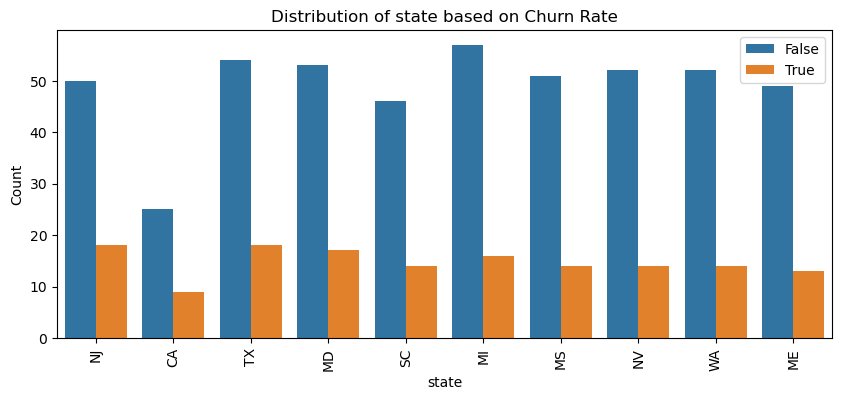

In [27]:
plot_categorical_distribution(Telecom1_df, 'state')

customers that churned, majority are from Texas, New Jersey, Maryland,Miami and NewYork

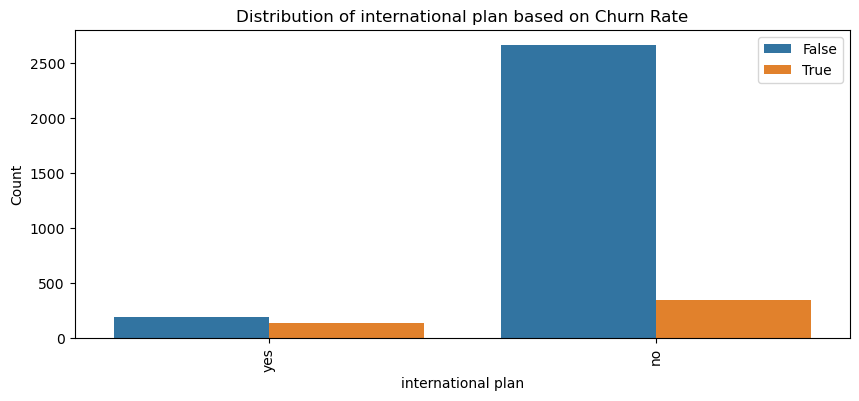

In [28]:
plot_categorical_distribution(Telecom1_df, 'international plan')

Most of the customers who churned did not have an international plan.

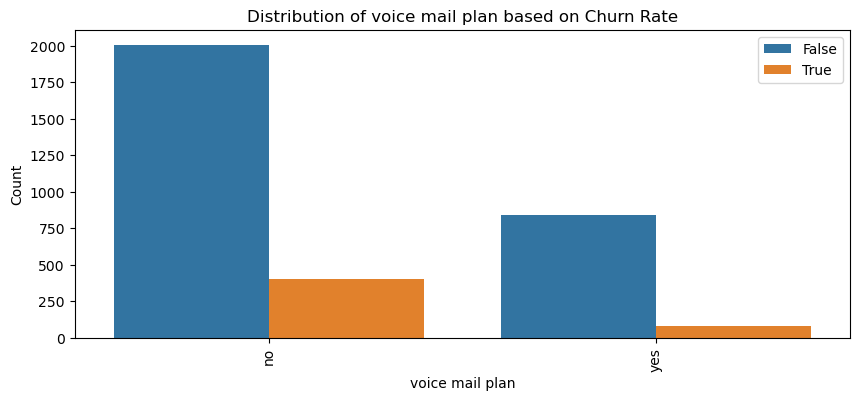

In [29]:
plot_categorical_distribution(Telecom1_df, 'voice mail plan')

Most customers who churned did not have an voicemail plan.

In [30]:
def plot_churn_kde(Telecom1_df, x_column, charge_type):
    """
    A function to plot features based on churn rate
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=Telecom1_df, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

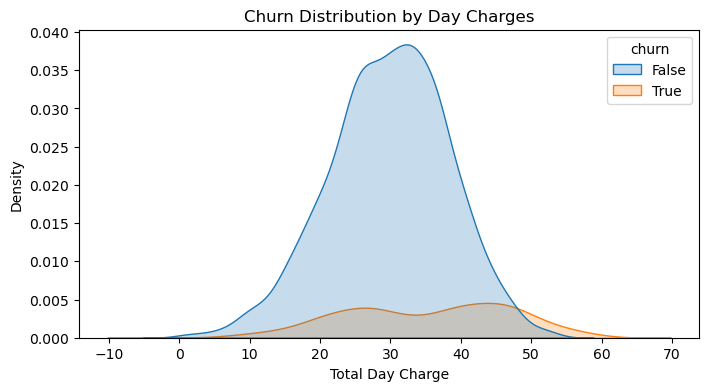

In [31]:
# Churn by day charges
plot_churn_kde(Telecom1_df, 'total day charge', 'Day')


The KDE plot depicting churn based on daily charges reveals a notable trend: customers who have terminated their accounts generally exhibit higher total day charges compared to those who haven't churned. This implies that individuals dissatisfied with the service or perceiving it as excessively costly during daytime hours might be more inclined to churn.







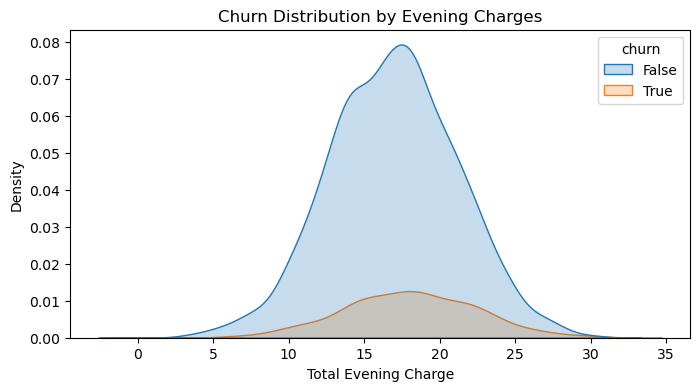

In [32]:
# Churn by evening charges
plot_churn_kde(Telecom1_df, 'total eve charge', 'Evening')

There is similarity with the distribution between customers who churn in the morning and evening based on the visualization.

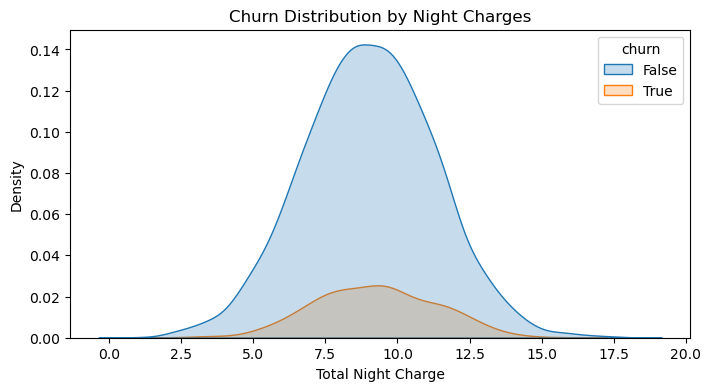

In [33]:
plot_churn_kde(Telecom1_df, 'total night charge', 'Night')

 churn by night charges shows a similar pattern to the churn by day charges and churn by evening charges plots. Customers who have terminated their accounts tend to have higher total night charges than customers who have not terminated their accounts.

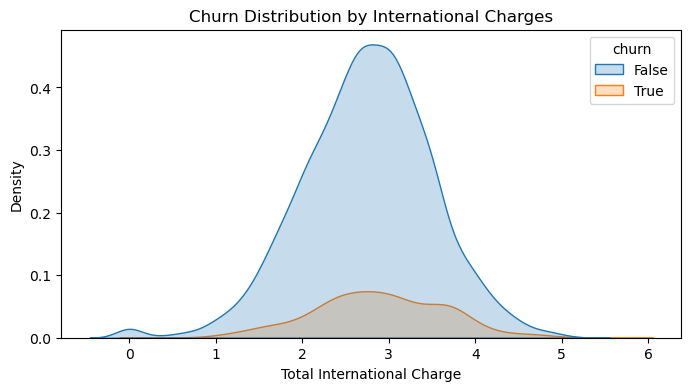

In [34]:
plot_churn_kde(Telecom1_df, 'total intl charge', 'International')

From the distribution customers with higher total international charges have a slightly higher likelihood of churning.

# Dealing with outliers

In [35]:
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(Telecom1_df)
print(Telecom1_df.shape)

(3169, 21)


## Correlation 


In [36]:
#Data type conversions
# Convert churn to binary encoding
Telecom1_df['international plan'] = Telecom1_df['international plan'].map({'no': 0, 'yes': 1})
# Convert voice mail plan binary encoding
Telecom1_df['voice mail plan'] = Telecom1_df['voice mail plan'].map({'no': 0, 'yes': 1})
# convert churn(target variable ) column from boolean to int 

Telecom1_df['churn'] = Telecom1_df['churn'].astype(int)



In [37]:
def corrmatrix(Telecom1_df):
    ''' This function plots a correlation matrix for a given dataframe '''
    plt.figure(figsize=(10,6))

    corr = Telecom1_df.corr()

    # Generate a mask to only show the bottom triangle
    corr_tri = corr.where(np.tril(np.ones(corr.shape)).astype(bool))

    sns.heatmap(data = corr_tri, center = 0, cmap = "YlGnBu", annot = True, fmt='.1g',vmin=-1);
    plt.title('Correlation of Features')
    plt.show()

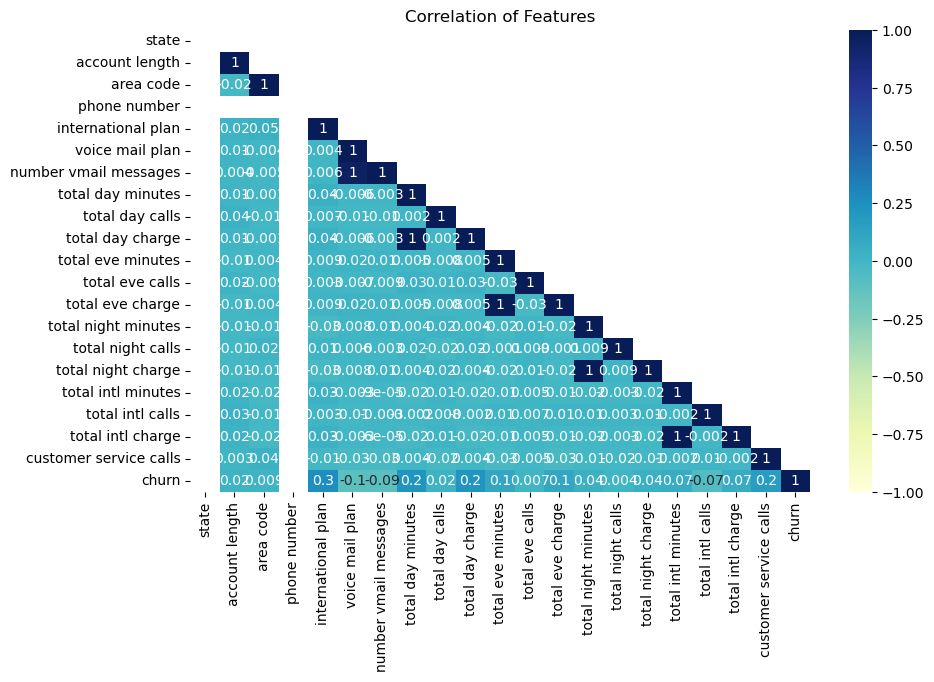

In [38]:
# Preprocess the dataframe
Telecom1_df = Telecom1_df.apply(pd.to_numeric, errors='coerce')

# Create the correlation matrix
corrmatrix(Telecom1_df)

From the matrix above we can conclude that most of the features are not correlated.The features that are correlated have a strong positive relationship between the other features.This means when one feature increases, the other features also tends to increase.
Some of the features that are correlated are:
1. Total day charge and total day minutes features have a srong positive correlation.
2. Total evening charge and total evening minutes features have a strong positive correlation.
3. Total night charge and total night minutes features are fully positively correlated.
4. Total int charge and total int minutes features are fully positively correlated.
These features can be seen to fall on the dark blue grid  which shows how strongly they are correlated

Some of the features that are close to the 0 mean that there is no linear relationship between the features.
 Correlation values close to -1 mean that there is a strong negative relationship between the features. This means when one feature increases, the other feature tends to decrease.
For the features that are perfectly correlated this is because the charges are a direct result of the minutes used. 

## Multicollinearity

In [39]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = Telecom1_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

data = Telecom1_df.drop(to_drop, axis=1) # Drop the features

The rows and columns that are highly correlated have been dropped

## Feature Engineering.

Label Encording

In [40]:
# Converting the columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
Telecom1_df['churn'] = label_encoder.fit_transform(Telecom1_df['churn'])
Telecom1_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,NaN,128,415,NaN,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,NaN,107,415,NaN,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NaN,137,415,NaN,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,NaN,84,408,NaN,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,NaN,75,415,NaN,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [41]:
Telecom1_df.drop('state',axis=1)

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,NaN,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,NaN,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,NaN,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,NaN,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,NaN,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,NaN,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,NaN,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,NaN,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,NaN,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


One Hot Encoding

This will  convert categorical columns into binary (0/1) vectors.

In [42]:
Telecom1_df = pd.get_dummies(Telecom1_df, columns=['state', 'area code', 'international plan', 'voice mail plan'])
Telecom1_df.head()


,account length,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl charge,customer service calls,churn,area code_408,area code_415,area code_510,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,128,NaN,25,265.1,110,45.07,197.4,99,16.78,244.7,...,2.70,1,0,False,True,False,True,False,False,True
1,107,NaN,26,161.6,123,27.47,195.5,103,16.62,254.4,...,3.70,1,0,False,True,False,True,False,False,True
2,137,NaN,0,243.4,114,41.38,121.2,110,10.30,162.6,...,3.29,0,0,False,True,False,True,False,True,False
3,84,NaN,0,299.4,71,50.90,61.9,88,5.26,196.9,...,1.78,2,0,True,False,False,False,True,True,False
4,75,NaN,0,166.7,113,28.34,148.3,122,12.61,186.9,...,2.73,3,0,False,True,False,False,True,True,False


Data scaling

In [43]:
def scale_column(column_values):
    return scaler.fit_transform(column_values.values.reshape(-1, 1))

scaler = MinMaxScaler()

numerical_columns = Telecom1_df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    Telecom1_df[column] = scale_column(Telecom1_df[column])

Telecom1_df.head()

,account length,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,total intl charge,customer service calls,churn,area code_408,area code_415,area code_510,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,0.587963,NaN,0.510204,0.773921,0.576271,0.773956,0.490079,0.487179,0.490082,0.643519,...,0.487585,0.2,0.0,False,True,False,True,False,False,True
1,0.490741,NaN,0.530612,0.450281,0.686441,0.450248,0.483796,0.521368,0.483858,0.675595,...,0.713318,0.2,0.0,False,True,False,True,False,False,True
2,0.629630,NaN,0.000000,0.706066,0.610169,0.706088,0.238095,0.581197,0.238040,0.372024,...,0.620767,0.0,0.0,False,True,False,True,False,True,False
3,0.384259,NaN,0.000000,0.881176,0.245763,0.881184,0.041997,0.393162,0.042007,0.485450,...,0.279910,0.4,0.0,True,False,False,False,True,True,False
4,0.342593,NaN,0.000000,0.466229,0.601695,0.466250,0.327712,0.683761,0.327888,0.452381,...,0.494357,0.6,0.0,False,True,False,False,True,True,False


## Modeling

The dataset we are working on is an example of a binary classification problem  which predicts churn (whether a customer will churn or not). This will  use a basic logistic regression model.The model will be evaluated on the recall score. Specifically, if it achieves an recall score of above 75% or higher, it will be considered a success.

To accomplish the outlined objectives specified in the project proposal, we plan to leverage a combination of diverse machine learning algorithms. The selected algorithms, each offering unique advantages, are tailored to address specific aspects of the project requirements. The following algorithms will be employed:
1. Logistic Regression
2. Decision Tree
3. Random Forest

In the assessment of our model performances, the ROC_AUC metric will be employed as a key evaluation measure. The ROC_AUC  is a comprehensive metric particularly well-suited for binary classification problems. It considers both sensitivity and specificity across various threshold levels, providing a robust indication of a model's ability to discriminate between classes.

Addressing the challenge of class imbalance within our dataset, we will SMOTE. Class imbalance, where one class significantly outnumbers the other, can lead to biased models that predominantly predict the majority class. SMOTE will serve as a crucial technique for mitigating this imbalance by generating synthetic instances of the minority class, thereby leveling the playing field during model training.

In [44]:
#Data Splitting
#Features
X = Telecom1_df.drop('churn', axis=1)  
#Target variable
y = Telecom1_df['churn'] 


In [45]:
X1 = X.drop('phone number',axis=1)
X1.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,total intl calls,total intl charge,customer service calls,area code_408,area code_415,area code_510,international plan_0,international plan_1,voice mail plan_0,voice mail plan_1
0,0.587963,0.510204,0.773921,0.576271,0.773956,0.490079,0.487179,0.490082,0.643519,0.422414,...,0.2,0.487585,0.2,False,True,False,True,False,False,True
1,0.490741,0.530612,0.450281,0.686441,0.450248,0.483796,0.521368,0.483858,0.675595,0.525862,...,0.2,0.713318,0.2,False,True,False,True,False,False,True
2,0.629630,0.000000,0.706066,0.610169,0.706088,0.238095,0.581197,0.238040,0.372024,0.534483,...,0.4,0.620767,0.0,False,True,False,True,False,True,False
3,0.384259,0.000000,0.881176,0.245763,0.881184,0.041997,0.393162,0.042007,0.485450,0.405172,...,0.6,0.279910,0.4,True,False,False,False,True,True,False
4,0.342593,0.000000,0.466229,0.601695,0.466250,0.327712,0.683761,0.327888,0.452381,0.681034,...,0.2,0.494357,0.6,False,True,False,False,True,True,False


Train-Test Split
Splitting data into train and test sets using a test_size of 0.2and a random_state 123

In [46]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=123)

 Using SMOTE to deal with class imbalance in the target variable

In [47]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC
smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X1_train,y_train)

## Logistic Regression

In [48]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=123)

In [49]:
# Fit the model on the training data 
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels of test set
y_pred_log = logreg.predict(X1_test)

In [50]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

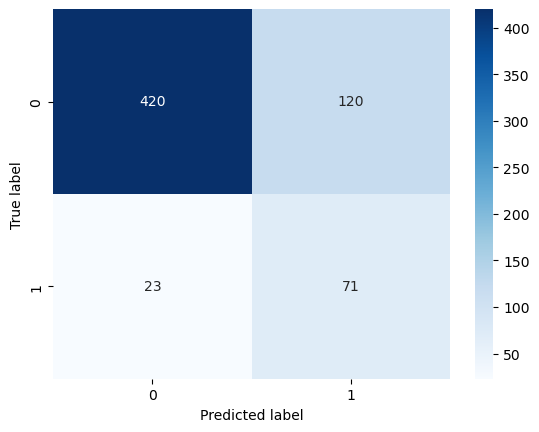

In [51]:
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [52]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.85       540
         1.0       0.37      0.76      0.50        94

    accuracy                           0.77       634
   macro avg       0.66      0.77      0.68       634
weighted avg       0.86      0.77      0.80       634



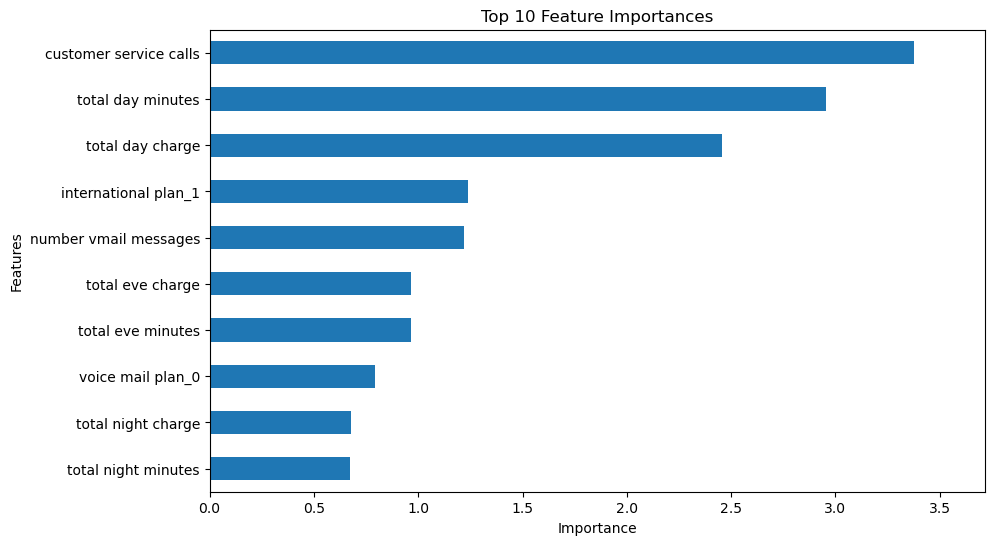

In [53]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
# Select the top 10 features
top_features = feature_importances[:10]  
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
# Set the xlim to the maximum importance value
plt.xlim(0, max(top_features)* 1.1)  
plt.show()

The logistic regression model exhibits a commendable recall score of 0.76, which, given its status as a baseline model, reflects strong performance. This score signifies the model's capability to accurately identify approximately 76% of actual positive instances. Despite its foundational nature, the model demonstrates effectiveness in capturing instances of interest, making it a valuable component of the predictive framework.

Upon closer examination through the lens of the confusion matrix, the model reveals a notable prevalence of true positives and true negatives, outweighing the occurrences of false positives and false negatives. This balance suggests that the logistic regression model consistently makes correct predictions, signaling a robust performance that avoids the pitfalls of overfitting. The emphasis on true positives and true negatives underscores the model's reliability in accurately classifying both positive and negative instances.

Delving into the model's feature importance analysis, the top three influential features are identified as total day charge, customer service calls, and total eve charge. These features emerge as pivotal contributors to the model's decision-making process, shedding light on the factors that significantly influence the prediction outcomes. The focus on total day charge and total eve charge indicates the importance of daytime and evening charges, while the role of customer service calls underscores the impact of customer interactions on churn prediction. This nuanced understanding of feature importance provides valuable insights for refining the model or guiding further investigations into customer behavior patterns.

## Decision Tree Classifier

In [54]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=123)

In [56]:
#Fit on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X1_test)

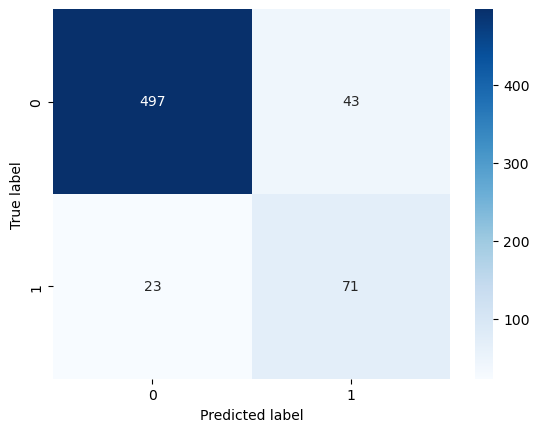

In [57]:
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

In [58]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       540
         1.0       0.62      0.76      0.68        94

    accuracy                           0.90       634
   macro avg       0.79      0.84      0.81       634
weighted avg       0.91      0.90      0.90       634



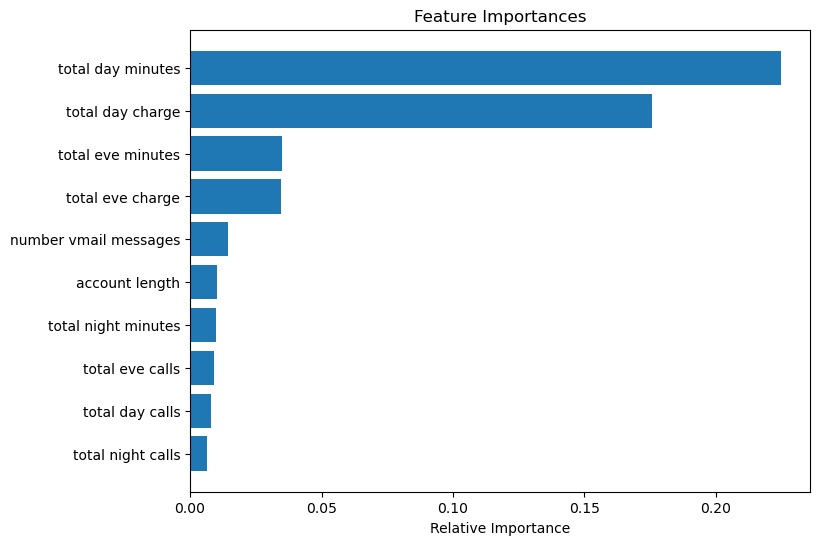

In [59]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The recall score of the decision tree model stands at 0.76, a commendable performance that falls slightly short of surpassing our baseline model. This score implies that the model proficiently identifies approximately 76% of actual positive instances. While not an improvement over the baseline, the model's ability to capture a substantial portion of positive instances indicates its effectiveness in identifying potential cases of interest.

Upon examination of the confusion matrix, it becomes evident that the decision tree model exhibits a notable prevalence of true positives and true negatives over false positives and false negatives. This observation suggests that the model is consistently making accurate predictions, showcasing a balanced performance that avoids overfitting. The emphasis on true positives and true negatives signifies the model's reliability in correctly classifying both positive and negative instances.

As revealed by the model's feature importance analysis, the top three influential features are total day charge, total eve charge, and total intl charge. These features emerge as pivotal contributors, indicating that the model places significant weight on the cumulative charges incurred during daytime, evening, and international periods. This insight into feature importance provides valuable context for understanding the factors driving the model's decision-making process and highlights areas of focus for further investigation or model refinement.







## Random Forest Classifier

In [60]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

In [61]:
#predict on the test data
y_pred_rf = rf_clf.predict(X1_test)

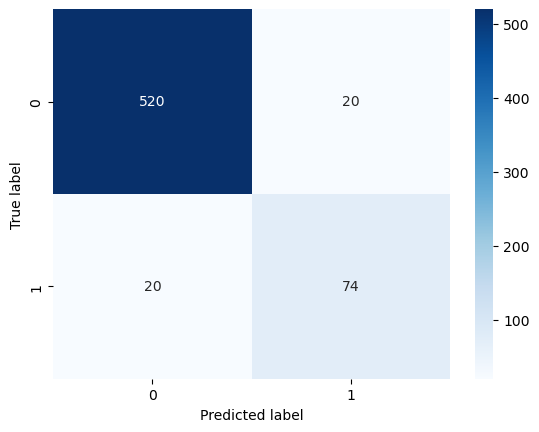

In [62]:
plot_confusion_matrix(y_test, y_pred_rf, [0,1])

In [63]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       540
         1.0       0.79      0.79      0.79        94

    accuracy                           0.94       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.94      0.94      0.94       634



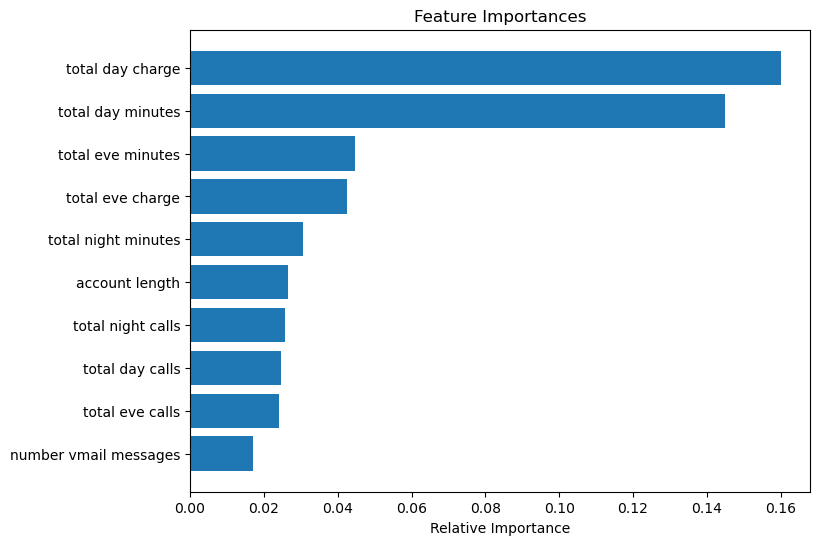

In [64]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier model exhibits an improved recall score of 0.79, showcasing a notable enhancement over its predecessor. This implies that the model accurately identifies approximately 79% of the actual positive instances.

Upon evaluation through the confusion matrix, it becomes evident that the model achieves a higher count of true positives and true negatives in comparison to false positives and false negatives. This suggests a robust performance, emphasizing the model's ability to make correct predictions more frequently than incorrect ones, indicative of its avoidance of overfitting.

As per the model's analysis, the top three most influential features are identified as total day charge, total international calls, and total evening charge.

5. Model Evaluation

In [67]:
np.random.seed(123)

# Assuming resampled_X_train, resampled_y_train, X1_test, and y_test are defined earlier

classifiers = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X1_test)
    
    recall = recall_score(y_test, y_pred)
    
    # Use pd.concat to concatenate the DataFrame
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__], 'recall': [recall]})], ignore_index=True)

# Set the name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

print(result_table)

                          recall
classifiers                     
LogisticRegression      0.755319
RandomForestClassifier  0.787234
DecisionTreeClassifier  0.755319


The results table shows that  RandomForestClassifier has the highest score followed by LogisticRegression and The DecisionTreeClassifier has the lowest recall score of 0.76.

Models Comparison - ROC Curve

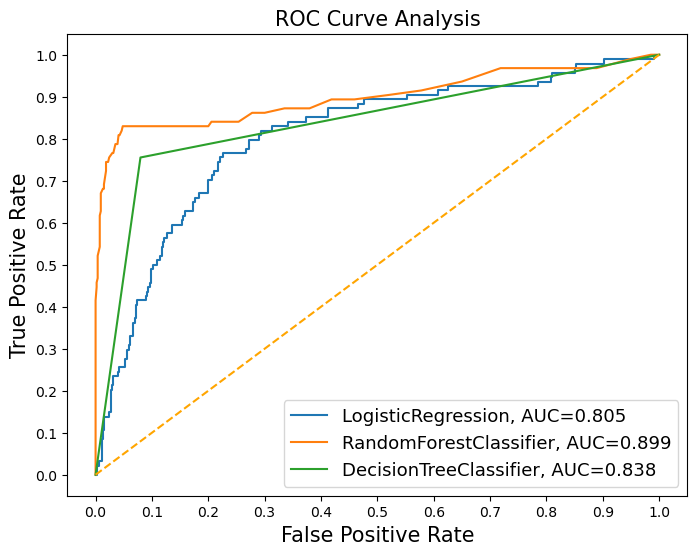

In [80]:
# Set a seed for reproducibility
np.random.seed(123)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Define lists to store results
classifiers_list = []
fpr_list = []
tpr_list = []
auc_list = []

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X1_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    # Store results in lists
    classifiers_list.append(cls.__class__.__name__)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

# Create a DataFrame from the lists
result_table = pd.DataFrame({
    'classifiers': classifiers_list,
    'fpr': fpr_list,
    'tpr': tpr_list,
    'auc': auc_list
})

# Set the name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot ROC Curve
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'], label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

The analysis of ROC curves reveals distinct performance levels among the classifiers, with RandomForestClassifier exhibiting the most robust performance, followed by DecisionTreeClassifier and LogisticRegression, in descending order. Notably, the RandomForestClassifier achieves the highest AUC score of 0.899, signifying superior discrimination between positive and negative instances. On the contrary, the LogisticRegression model attains the lowest AUC score at 0.805.

The ROC curve is a graphical representation illustrating the balance between the true positive rate (TPR) and the false positive rate (FPR) for a binary classifier. TPR reflects the accuracy of positive instance predictions, while FPR indicates the rate of misclassification for negative instances. The AUC, representing the area under the ROC curve, serves as a comprehensive metric for assessing classifier performance.

A heightened AUC score indicates an enhanced ability of the classifier to effectively differentiate between positive and negative instances. In this context, the superior AUC score of the RandomForestClassifier underscores its proficiency in making accurate predictions, thereby solidifying its position as the top-performing classifier in the analyzed set.







##  Model Tuning

In [83]:
# Define a smaller hyperparameter grid
param_grid = {
    "max_depth": [8, 15],
    "n_estimators": [500],
    "min_samples_split": [5, 10],
    "criterion": ['entropy', 'gini']
}

# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state=123)

# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=2, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 500}


In [85]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 15,
                                  min_samples_split = 5,
                                  n_estimators = 500,
                                  random_state=123)
#Fit the model on the training data
rf_tuned.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_estimators=500, random_state=123)

In [87]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X1_test)

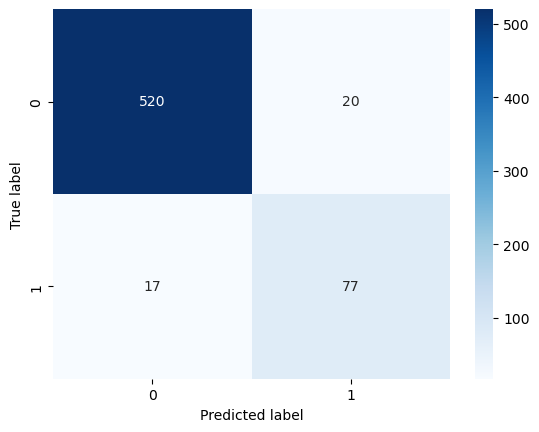

In [88]:
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [89]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       540
         1.0       0.79      0.82      0.81        94

    accuracy                           0.94       634
   macro avg       0.88      0.89      0.89       634
weighted avg       0.94      0.94      0.94       634



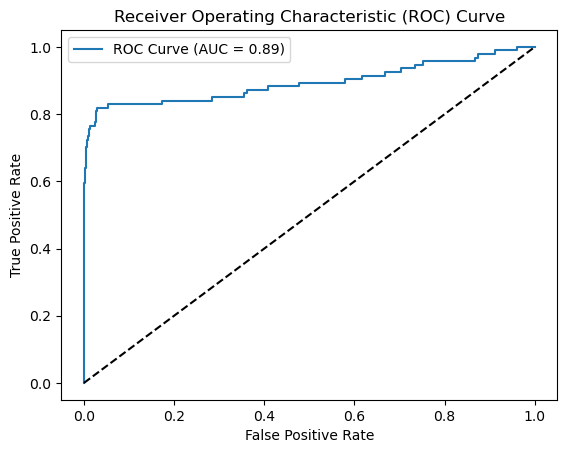

In [91]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X1_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The tuned Random Forest model demonstrates strong performance in discerning between positive (churned) and negative (non-churned) customer classes, particularly in accurately identifying churned customers. The model achieves a recall score of 0.76, indicating its ability to correctly capture 76% of the actual churned customers.

## Conclusion

The Random Forest classifier has demonstrated commendable performance with a recall score of 79% in predicting customer churn. This metric reflects the model's ability to accurately identify and capture a significant proportion of actual positive instances, which is particularly crucial in scenarios where minimizing false negatives is a priority.

While the current model meets the objectives of predicting customer churn and achieving an acceptable recall score, there is an acknowledgment that further improvement is possible through additional feature engineering. Feature engineering involves manipulating or creating new features in the dataset to enhance the model's ability to discern patterns and relationships.

Given more time, a comprehensive exploration of potential features and their impact on the model could be conducted. This may involve analyzing customer behavior, transaction patterns, or other relevant variables that could contribute valuable information for predicting churn.

The decision to prioritize recall indicates a focus on minimizing the number of customers incorrectly classified as non-churners when they actually churn. This is often crucial in industries where customer retention is a priority, and proactive measures can be taken to retain potentially at-risk customers.

In summary, while the Random Forest classifier has achieved satisfactory results, the commitment to continuous improvement prompts a deeper dive into feature engineering. This pursuit aims to refine the model's predictive capabilities and potentially elevate the recall score, contributing to an even more effective and robust customer churn prediction system.

## Recommendation

In response to the observed higher churn rates in area codes 415 and 510, it is recommended to implement targeted promotional strategies, specifically offering discounts and promotional offers to customers within these areas. By providing incentives, such as exclusive discounts, the aim is to foster customer loyalty and discourage churn. This localized approach acknowledges the unique characteristics and challenges associated with these specific geographical regions.

Additionally, recognizing the critical role of customer service in customer retention, there is a proposal to invest in improving the quality of customer service. This involves enhancing the training programs for customer service representatives, equipping them with the skills and knowledge to promptly and effectively address customer issues. The objective is to elevate customer satisfaction levels and, consequently, reduce the likelihood of churn. By minimizing the need for customers to reach out with concerns, this initiative contributes to a smoother overall customer experience.

An evaluation of the existing pricing structure for day, evening, night, and international charges is recommended. Considering the impact of charges on customer decisions to churn, there is a suggestion to explore adjustments to pricing plans or the introduction of discounted packages. This strategic pricing review aims to address any discrepancies and make the company's offerings more competitive, ultimately mitigating factors that contribute to customer churn.

In states with notably higher churn rates, such as Texas, New Jersey, Maryland, Miami, and New York, a targeted customer retention strategy is advised. This may involve the implementation of personalized marketing campaigns, tailored offers, and enhanced customer support initiatives. Recognizing and addressing the specific needs and preferences of customers in these states is crucial for establishing a stronger connection and reducing churn.

To further enrich the company's service offerings, there is a proposal to enhance the value proposition of the voicemail plan. By showcasing the benefits and convenience of voicemail services and potentially introducing additional features or discounts, the goal is to increase adoption among customers. This approach aligns with the broader objective of diversifying and maximizing the appeal of the company's service portfolio to strengthen customer loyalty and retention.





